In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 폰트
plt.rc('font', family = 'AppleGothic')

# 그래프를 이미지로 저장할 때
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'Scatter_plot'

In [43]:
def FileSave():
    global cnt
    cnt +=1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi = 400)
    print(savefile + '파일이 저장되었습니다.')

In [44]:
# 그림의 형식 스타일 지정
plt.style.use('ggplot')

# 색상 구분 X

    manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       

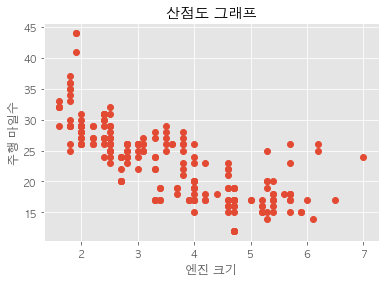

In [45]:
# data load
mpg = pd.read_csv('../data/mpg.csv')
print(mpg)
x_data = mpg['displ'] # 엔진 크기
y_data = mpg['hwy'] # 주행 마일수

# draw plot
fig1 = plt.figure()
plt.plot(x_data, y_data, marker = 'o', linestyle = 'None')
plt.ylabel('주행 마일수')
plt.xlabel('엔진 크기')
plt.title('산점도 그래프')
plt.grid(True)

# plt.show()
FileSave()

# 구동방식에 따른 색상 구분

    manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       

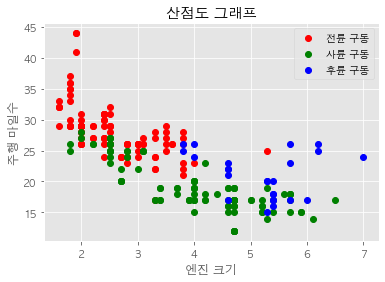

In [46]:
# data load
mpg = pd.read_csv('../data/mpg.csv')
print(mpg)
x_data = mpg['displ'] # 엔진 크기
y_data = mpg['hwy'] # 주행 마일수
labels = mpg['drv'].unique() # 구동방식
print(labels)
colors = ['r', 'g', 'b']
label_dict = {'f': '전륜 구동', '4' : '사륜 구동', 'r':'후륜 구동'}


# draw plot
fig2 = plt.figure()

idx = 0
for x in labels:
    x_data = mpg.loc[mpg['drv'] == x, 'displ']
    y_data = mpg.loc[mpg['drv'] == x, 'hwy']
    plt.plot(x_data, y_data, color = colors[idx], marker = 'o', linestyle = 'None', label = label_dict[x])
    idx +=1
    
plt.legend()
plt.title('산점도 그래프')
plt.xlabel('엔진 크기')
plt.ylabel('주행 마일수')
plt.grid(True)

# plt.show()
FileSave()

# 산점도와 히스토그램을 동시에 그리기

Scatter_plot_03.png파일이 저장되었습니다.


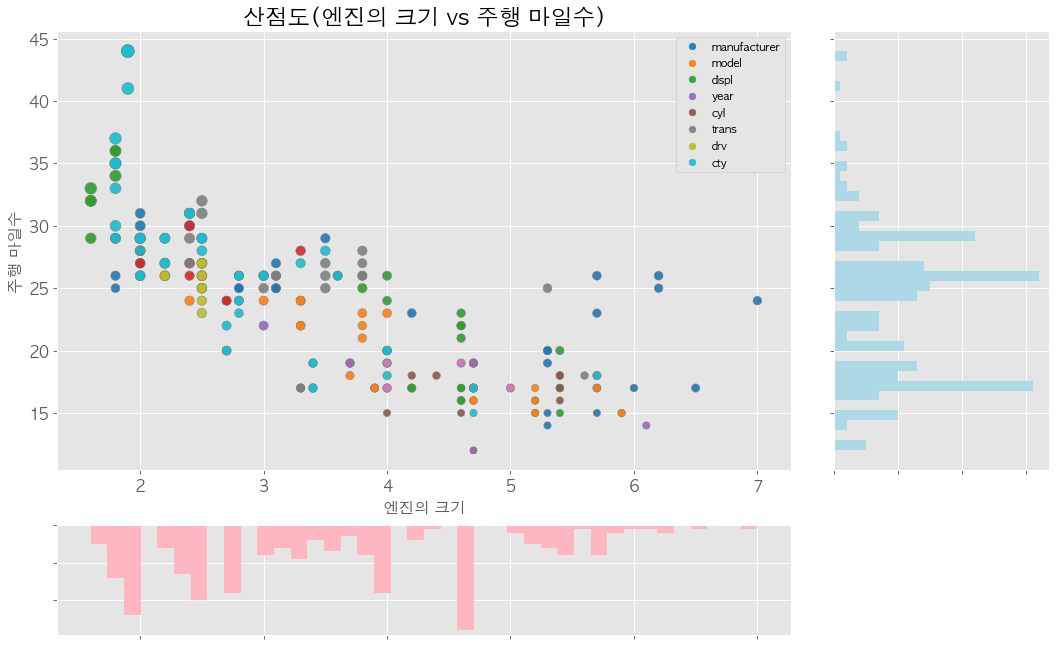

In [47]:
# data load
mpg = pd.read_csv('../data/mpg.csv')


# draw plot
fig3 = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2) # 행과 열을 4x4로 공간을 나누겠다. - 총 16개의 그림

ax_main = fig3.add_subplot(grid[:-1, :-1]) # scatter plot
ax_right = fig3.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[]) # histogram
ax_bottom = fig3.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[]) # histogram

# 메인 그래프
scatter = ax_main.scatter('displ', 'hwy', s=mpg.cty*4, c=mpg.manufacturer.astype('category').cat.codes, 
                alpha=.9, data=mpg, cmap="tab10", edgecolors='gray', linewidths=.5)
#legend
handles, labels = scatter.legend_elements()
legend = ax_main.legend(handles, mpg)
ax_main.add_artist(legend)

# 하단의 histogram, bin = 40
ax_bottom.hist(mpg.displ, 40, histtype='stepfilled', orientation='vertical', color='lightpink')
ax_bottom.invert_yaxis()

# 오른쪽 histogram
ax_right.hist(mpg.hwy, 40, histtype='stepfilled', orientation='horizontal', color='lightblue')

# Decorations
ax_main.set(title='산점도(엔진의 크기 vs 주행 마일수)', xlabel='엔진의 크기', ylabel='주행 마일수')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

# plt.show()
FileSave()

# 산점도의 크기와 색상을 정하기

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]
       carat        cut color clarity  depth  tab

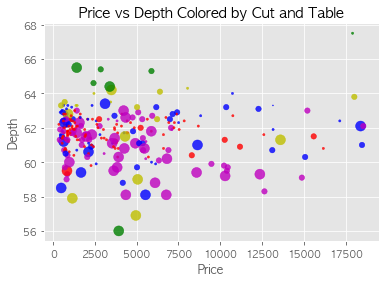

In [48]:
# data load
diamonds = pd.read_csv('../data/diamonds.csv')
print(diamonds)

# data sampling
FRACTION = 0.005
diamonds = diamonds.sample(frac=FRACTION)
print(diamonds)
print(diamonds.columns)

# chart data
x_data = diamonds['price']
y_data = diamonds['depth']

# 원의 크기 : table에 따른 크기 구분
size = diamonds['table'] 
print(size.max())
print(size.min())

# 색깔 : cut에 따른 색깔 구분
colors = ['r', 'g', 'b', 'y', 'm']
cut_list = diamonds['cut'].unique()
print(cut_list)
color_dict = {cut_list[idx] : colors[idx] for idx in range(len(cut_list))}
print(color_dict)

# color, size 지정
def apply_color(cut):
    return color_dict[cut]

diamonds['new_cut'] = diamonds['cut'].apply(apply_color)
new_cut = diamonds['new_cut']


def apply_size(size):
    if size >=60:
        return 100
    elif size >=58:
        return 30
    elif size >= 54:
        return 5
    else:
        return 1

diamonds['new_table'] = diamonds['table'].apply(apply_size)
new_table = diamonds['new_table']

print(diamonds.head())


# chart draw
scatter_plot1 = plt.figure()
ax1 = scatter_plot1.add_subplot(1, 1, 1)

ax1.scatter(x=x_data, y=y_data, s=new_table, c = new_cut, alpha = 0.8) # s : 도형의 크기, c : 색상 이름
ax1.set_title('Price vs Depth Colored by Cut and Table')
ax1.set_xlabel('Price')
ax1.set_ylabel('Depth')

# plt.show()
FileSave()

# 크기와 색상이 다른 산점도그래프에 legend추가

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]
       carat        cut color clarity  depth  tab

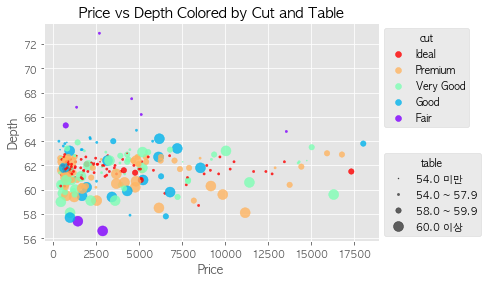

In [49]:
# data load
diamonds = pd.read_csv('../data/diamonds.csv')
print(diamonds)

# data sampling
FRACTION = 0.005
diamonds = diamonds.sample(frac=FRACTION)
print(diamonds)
print(diamonds.columns)

# chart data
x_data = diamonds['price']
y_data = diamonds['depth']

# 원의 크기 : table에 따른 크기 구분
size = diamonds['table'] 
print(size.max())
print(size.min())

# 색깔 : cut에 따른 색깔 구분
colors = ['r', 'g', 'b', 'y', 'm']
cut_list = diamonds['cut'].unique()
print(cut_list)
color_dict = {cut_list[idx] : colors[idx] for idx in range(len(cut_list))}
print(color_dict)

# color, size 지정
def apply_color(cut):
    return color_dict[cut]

diamonds['new_cut'] = diamonds['cut'].apply(apply_color)
new_cut = diamonds['new_cut']


def apply_size(size):
    if size >=60:
        return 100
    elif size >=58:
        return 30
    elif size >= 54:
        return 5
    else:
        return 1

diamonds['new_table'] = diamonds['table'].apply(apply_size)
new_table = diamonds['new_table']

print(diamonds.head())

def cut_to_int(cut):
    return dict(zip(colors, range(len(colors))))[cut]

# chart draw
scatter_plot2 = plt.figure()
ax1 = scatter_plot2.add_subplot(1, 1, 1)

scatter = ax1.scatter(x=x_data, y=y_data, s=new_table, c=new_cut.apply(cut_to_int), cmap='rainbow_r', alpha=0.8)
ax1.set_title('Price vs Depth Colored by Cut and Table')
ax1.set_xlabel('Price')
ax1.set_ylabel('Depth')

# legend
handles, labels = scatter.legend_elements()
legend1 = ax1.legend(handles, cut_list,
                    loc="upper left", title="cut", bbox_to_anchor=(1, 1))
ax1.add_artist(legend1)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax1.legend(handles, ['54.0 미만', '54.0 ~ 57.9', '58.0 ~ 59.9', '60.0 이상'],
                     loc="lower left", title="table", bbox_to_anchor=(1, 0))
# plt.show()
FileSave()

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]
       carat        cut color clarity  depth  tab

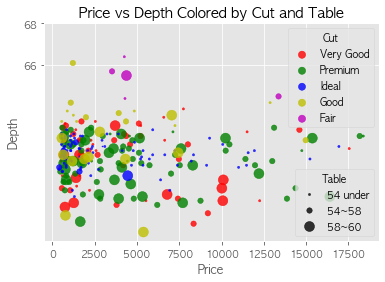

In [50]:
# data load
diamonds = pd.read_csv('../data/diamonds.csv')
print(diamonds)

# data sampling
FRACTION = 0.005
diamonds = diamonds.sample(frac=FRACTION)
print(diamonds)
print(diamonds.columns)

# chart data
x_data = diamonds['price']
y_data = diamonds['depth']

# 원의 크기 : table에 따른 크기 구분
size = diamonds['table'] 
print(size.max())
print(size.min())

# 색깔 : cut에 따른 색깔 구분
colors = ['r', 'g', 'b', 'y', 'm']
cut_list = diamonds['cut'].unique()
print(cut_list)
color_dict = {cut_list[idx] : colors[idx] for idx in range(len(cut_list))}
print(color_dict)

# color, size 지정
def apply_color(cut):
    return color_dict[cut]

diamonds['new_cut'] = diamonds['cut'].apply(apply_color)
new_cut = diamonds['new_cut']


def apply_size(size):
    if size >=60:
        return 100
    elif size >=58:
        return 30
    elif size >= 54:
        return 5
    else:
        return 1

diamonds['new_table'] = diamonds['table'].apply(apply_size)
new_table = diamonds['new_table']

print(diamonds.head())


# chart draw - legend : cut, table
table_label = {'1' : '54 under', '5' : '54~58', '30' : '58~60', '100' : '60 upper'}
plt.style.use('ggplot')
scatter_plot3 = plt.figure()
ax_ = scatter_plot3.add_subplot(1, 1, 1)

idx = 0
for x in cut_list:
    x_data = diamonds.loc[diamonds['cut'] == x, 'price']
    y_data = diamonds.loc[diamonds['cut'] == x, 'depth']
    color = diamonds.loc[diamonds['cut'] == x, 'new_cut']
    size = diamonds.loc[diamonds['cut'] == x, 'new_table']
    scatter_ = ax_.scatter(x=x_data, y=y_data, s = size, c = color, alpha = 0.8, label = x) # s : 도형의 크기, c : 색상
    idx+=1


# cut에 대한 legend
legend1 = ax_.legend(title="Cut", loc = 'upper right')  
ax_.add_artist(legend1)
# table에 대한 legend
handles, labels= scatter_.legend_elements(prop="sizes")
legend2 = ax_.legend(handles, table_label.values(), title = "Table", loc = 'lower right')



ax_.grid(True)
ax_.set_title('Price vs Depth Colored by Cut and Table')
ax_.set_xlabel('Price')
ax_.set_ylabel('Depth')


# ytick
YTICKS_INTERVAL = 2
maxlim = int(y_data.max() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # max
minlim = int(y_data.min() / YTICKS_INTERVAL + 1) * YTICKS_INTERVAL # min
values = np.arange(minlim, maxlim+1, YTICKS_INTERVAL)
plt.yticks(values)


# plt.show()
FileSave()

In [51]:
from matplotlib.backends.backend_pdf import PdfPages

pdfsave = PdfPages(CHART_NAME + "_19011773.pdf")
pdfsave.savefig(fig1)
pdfsave.savefig(fig2)
pdfsave.savefig(fig3)
pdfsave.savefig(scatter_plot1)
pdfsave.savefig(scatter_plot2)
pdfsave.savefig(scatter_plot3)
pdfsave.close()